In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Montem l'unitat de Drive a Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Data_cleaning_final/

/content/drive/MyDrive/Data_cleaning_final


In [4]:
pd.set_option("display.max_columns", None)

# Carreguem el dataframe
df = pd.read_csv('Llista_de_reparacio_juridica_de_victimes_del_franquisme__1938-1978__20250414.csv')

In [5]:
# Copiem el dataframe original per a mantenir-lo
df_original = df.copy()

In [6]:
# Observem el dataframe
df.head()

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Pedanies/Agregats naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Pedanies/Agregats residencia,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Num causa,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Ref num arxiu,Autoria de la descripció,Data de la descripció,Data correccio registre,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89
0,135218,"ABAD ALFONSO, Erundina",ABAD ALFONSO,Erundina,Dona,43.0,Alcoi,--,Alcoià,Alacant,Comunitat Valenciana,Espanya,Barcelona,--,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,030827,1942.0,1943.0,Sobreseïment,NaN,NaN,37729.0,ANC,12/07/2017,NaN,-47318376.0,3.869837e+09,217634927.0,4.138425e+09
1,25335,"ABAD ARBÓS, Ricardo",ABAD ARBÓS,Ricardo,Home,30.0,Barcelona,--,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,--,Barcelonès,Barcelona,Catalunya,Espanya,--,--,--,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,12842.0,ANC,12/07/2017,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09
2,123192,"ABAD BARAS, José",ABAD BARAS,José,Home,30.0,Benavarri,--,Ribagorça,Osca,Aragó,Espanya,Lleida,--,Segrià,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,000940,1939.0,1939.0,Absolt,NaN,NaN,49476.0,ANC,12/07/2017,NaN,48188113.0,4.210699e+09,62061934.0,4.161527e+09
3,171,"ABAD BATLLONE, Juan",ABAD BATLLONE,Juan,Home,42.0,Barcelona,--,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,--,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,--,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,4063.0,ANC,12/07/2017,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09
4,24485,"ABAD BOIRA, Ricardo",ABAD BOIRA,Ricardo,Home,48.0,Tauste,--,--,Saragossa,Aragó,Espanya,Barcelona,--,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,--,1941.0,1942.0,Sense declaració de responsabilitats,NaN,NaN,12915.0,ANC,12/07/2017,NaN,-125694062.0,4.192139e+09,217634927.0,4.138425e+09


In [7]:
# Revisem el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69833 entries, 0 to 69832
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Codi                                 69833 non-null  int64  
 1   Cognoms nom                          69833 non-null  object 
 2   Cognoms                              69816 non-null  object 
 3   Nom                                  69819 non-null  object 
 4   Sexe                                 69833 non-null  object 
 5   Edat                                 69827 non-null  float64
 6   Municipi naixement                   69833 non-null  object 
 7   Pedanies/Agregats naixement          69833 non-null  object 
 8   Comarca naixement                    69833 non-null  object 
 9   Província naixement                  69833 non-null  object 
 10  Comunitat autònoma naixement         69833 non-null  object 
 11  País naixement              

In [8]:
# Eliminem les columnes que no ens interessen per al anàlisi quantitatiu i les visualitzacions a shiny

df = df.drop(["Pedanies/Agregats naixement", "Pedanies/Agregats residencia", "Num causa", "Ref num arxiu", "Autoria de la descripció", "Data de la descripció", "Data correccio registre"], axis=1)

In [9]:
# Comprovem els valors nuls i els 0 de les variables
print(df.isna().sum())

Codi                                       0
Cognoms nom                                0
Cognoms                                   17
Nom                                       14
Sexe                                       0
Edat                                       6
Municipi naixement                         0
Comarca naixement                          0
Província naixement                        0
Comunitat autònoma naixement               0
País naixement                             0
Municipi residència                        0
Comarca residència                         0
Província residència                       0
Comunitat autònoma residència              0
País residència                            0
Tipus procediment 1                        0
Tipus procediment 2                        0
Any inicial                               62
Any aprovació sen o altra resol         4144
Pena                                       0
Commutació/indult (demanat)            54502
Afusellade

In [10]:
# Revisem quines entrades no tenen cognoms
df[df["Cognoms"].isna()]

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89
758,103990,AJOBLANCO,NaN,AJOBLANCO,--,0.0,--,--,--,--,--,--,--,--,--,--,Diligències prèvies,Diligències prèvies,1978.0,1979.0,Arxiu,NaN,NaN,NaN,NaN,NaN,NaN
14571,134935,CENTRO DE DEPORTES VILLANUEVA,NaN,CENTRO DE DEPORTES VILLANUEVA,--,0.0,--,--,--,--,--,--,--,--,--,--,Diligències prèvies,Diligències prèvies,1940.0,1942.0,Sense declaració de responsabilitats,NaN,NaN,NaN,NaN,NaN,NaN
16685,144051,COOPERATIVA AGROPECUARIA DE GUISSONA CASA RURA...,NaN,COOPERATIVA AGROPECUARIA DE GUISSONA CASA RURA...,--,0.0,--,--,--,--,--,--,--,--,--,--,Diligències prèvies,Diligències prèvies,1971.0,1971.0,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN
19834,148190,EL NOTICIERO UNIVERSAL,NaN,EL NOTICIERO UNIVERSAL,--,0.0,--,--,--,--,--,--,--,--,--,--,Diligències prèvies,Diligències prèvies,1976.0,1977.0,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN
19835,147794,EL PAPUS,NaN,EL PAPUS,--,0.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Causa ordinària,1976.0,1977.0,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN
19920,144697,ENDAVANT,NaN,ENDAVANT,--,0.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra [],Causa ordinària,1978.0,1978.0,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN
31403,33085,HILADOS TORRAS S A,NaN,HILADOS TORRAS S A,--,0.0,--,--,--,--,--,--,--,--,--,--,Diligències prèvies,Diligències prèvies,1939.0,1943.0,Sense declaració de responsabilitats,NaN,NaN,NaN,NaN,NaN,NaN
31982,143806,INTERVIU,NaN,INTERVIU,--,0.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra [],Causa ordinària,1978.0,1978.0,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN
31983,144502,INTERVIU,NaN,INTERVIU,--,0.0,--,--,--,--,--,--,--,--,--,--,Diligències prèvies,Diligències prèvies,1977.0,1977.0,Sense declaració de responsabilitats,NaN,NaN,NaN,NaN,NaN,NaN
33262,144537,LA AURORA,NaN,LA AURORA,--,0.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra [],Causa ordinària,1978.0,1978.0,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Comprobació persones jurídiques
print("Nombre de persones sense cognoms:", df["Cognoms"].isna().sum())
print("Nombre de persones amb edat 0 (persones jurídiques):", (df["Edat"] == 0).sum())

Nombre de persones sense cognoms: 17
Nombre de persones amb edat 0 (persones jurídiques): 17


In [12]:
# Eliminem persones jurídiques de les nostres dades
df = df.dropna(subset=["Cognoms"])
print("Nombre de persones sense cognoms:", df["Cognoms"].isna().sum())
print("Nombre de persones amb edat 0 (persones jurídiques):", (df["Edat"] == 0).sum())

Nombre de persones sense cognoms: 0
Nombre de persones amb edat 0 (persones jurídiques): 0


In [13]:
# Revisem quines entrades no tenen nom
df[df["Nom"].isna()]

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89
2848,115868,ANTONIO,ANTONIO,NaN,Home,9999.0,--,--,--,--,--,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1940.0,1943.0,Arxiu,NaN,NaN,NaN,NaN,217634927.0,4.138425e+09
18369,3356,DALMAU COSTA,DALMAU COSTA,NaN,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Diligències prèvies,Diligències prèvies,1939.0,1939.0,Arxiu,NaN,NaN,NaN,NaN,NaN,NaN
19254,90195,DOMINGO,DOMINGO,NaN,Home,9999.0,--,--,--,--,--,Horta de Sant Joan,Terra Alta,Tarragona,Catalunya,Espanya,--,--,1947.0,1949.0,Suspensió,NaN,NaN,NaN,NaN,31710201.0,4.095399e+09
19960,117833,ENRIQUE,ENRIQUE,NaN,Home,9999.0,--,--,--,--,--,Albesa,Noguera,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1938.0,1938.0,Arxiu,NaN,NaN,NaN,NaN,6604596.0,4.175101e+09
22185,118628,FERNÁNDEZ ABELLEIRA,FERNÁNDEZ ABELLEIRA,NaN,Home,9999.0,--,--,--,--,--,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1941.0,1943.0,Arxiu,NaN,NaN,NaN,NaN,217634927.0,4.138425e+09
26676,85681,"GARCÍA VÉLEZ,",GARCÍA VÉLEZ,NaN,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Causa ordinària,1940.0,1943.0,Arxiu,NaN,NaN,NaN,NaN,NaN,NaN
26783,119305,GARRAY,GARRAY,NaN,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,1938.0,1938.0,Arxiu,NaN,NaN,NaN,NaN,NaN,NaN
36446,118980,MANZANO,MANZANO,NaN,Home,9999.0,--,--,--,--,--,Os de Balaguer,Noguera,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1938.0,1938.0,Arxiu,NaN,NaN,NaN,NaN,71839622.0,4.187164e+09
45580,76264,OSSORIO TAFALL,OSSORIO TAFALL,NaN,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra [],Causa ordinària,1947.0,NaN,Suspensió,NaN,NaN,NaN,NaN,NaN,NaN
46887,118292,PARRAMONA …,PARRAMONA …,NaN,Home,9999.0,--,--,--,--,--,Albesa,Noguera,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1938.0,1938.0,Arxiu,NaN,NaN,NaN,NaN,6604596.0,4.175101e+09


In [14]:
# Eliminem aquestes entrades ja que tampoc tenim informació sobre la seva edat i no seran molt útils
df = df.dropna(subset=["Nom"])
print("Nombre de persones sense nom:", df["Nom"].isna().sum())

Nombre de persones sense nom: 0


In [15]:
# Revisem quines entrades no tenen edat
df[df["Edat"].isna()]

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89
2948,984,"ARAGONÉS LLOBET, Isabel",ARAGONÉS LLOBET,Isabel,Dona,NaN,--,--,--,--,--,Molins de Rei,Baix Llobregat,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Absolta,NaN,NaN,NaN,NaN,201736908.0,414132111.0
6736,232,"BELTRAN FUMANAL, Antonia",BELTRAN FUMANAL,Antonia,Dona,NaN,--,--,--,--,--,Sant Sadurní d'Anoia,Alt Penedès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Absolta,NaN,NaN,NaN,NaN,179006877.0,414247105.0
36464,154337,"MARANJES PRAT, Isidra",MARANJES PRAT,Isidra,Dona,NaN,--,--,--,--,--,--,--,--,--,--,--,Sumaríssim,1941.0,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN
39254,154335,"MASSÓ URGELLES, Enrique",MASSÓ URGELLES,Enrique,Home,NaN,--,--,--,--,--,--,--,--,--,--,--,Sumaríssim,1941.0,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN
45805,154338,"PAGÈS PASSART, Isabel",PAGÈS PASSART,Isabel,Dona,NaN,--,--,--,--,--,--,--,--,--,--,--,Sumaríssim,1941.0,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN
69530,154336,"XALMET TRIAS, Ramon",XALMET TRIAS,Ramon,Home,NaN,--,--,--,--,--,--,--,--,--,--,--,Sumaríssim,1941.0,NaN,--,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Les eliminem ja que no tenen molta informació útil
df = df.dropna(subset=["Edat"])
print("Nombre de persones sense edat:", df["Edat"].isna().sum())

Nombre de persones sense edat: 0


In [17]:
# Comprovem si els camps on no tenim any inicial tampoc tenim any de resolució
print("Entrades que no tenen any inicial ni de resolució:", ((df['Any inicial'].isna()) & (df['Any aprovació sen o altra resol'].isna())).sum())

Entrades que no tenen any inicial ni de resolució: 59


In [18]:
df[(df['Any inicial'].isna()) & (df['Any aprovació sen o altra resol'].isna())]

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89
1990,123633,"ALVAREZ DE LARA CAMPAJO, Vicente",ALVAREZ DE LARA CAMPAJO,Vicente,Home,21.0,Sabadell,Vallès Occidental,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,NaN,NaN,Mort,NaN,executat/da,210778994.0,4.154696e+09,217634927.0,4.138425e+09
2285,42847,"AMIEL FÀBREGA, Pelayo",AMIEL FÀBREGA,Pelayo,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,Dotze anys i un dia de reclusió temporal,NaN,NaN,NaN,NaN,NaN,NaN
4395,21303,"BABOT VALLVÉ, Tomás",BABOT VALLVÉ,Tomás,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN
5927,21257,"BARROS CELA, Fabián",BARROS CELA,Fabián,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,Quinze anys de reclusió temporal,NaN,NaN,NaN,NaN,NaN,NaN
5951,21261,"BARRUFET TORRAS, Jaime",BARRUFET TORRAS,Jaime,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,Sobreseïment,NaN,NaN,NaN,NaN,NaN,NaN
6302,43072,"BATLLE GENOVER, Tomàs",BATLLE GENOVER,Tomàs,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,Reclusió perpètua,NaN,NaN,NaN,NaN,NaN,NaN
6436,41188,"BAYES PLANAS, Martín",BAYES PLANAS,Martín,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,No consta,Indultat,NaN,NaN,NaN,NaN,NaN
7496,41267,"BERTRAN VEHÍ, Narciso",BERTRAN VEHÍ,Narciso,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,Reclusió perpètua,NaN,NaN,NaN,NaN,NaN,NaN
8016,42602,"BOADA CALZADA, Francisco",BOADA CALZADA,Francisco,Home,67.0,Sant Feliu de Guíxols,Baix Empordà,Girona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,NaN,NaN,Absolt,NaN,NaN,302869534.0,4.178043e+09,217634927.0,4.138425e+09
8841,21286,"BORRÀS SERRES, Enrique",BORRÀS SERRES,Enrique,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,NaN,NaN,Quatre anys de presó menor,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Eliminem els camps que compleixen les dos condicions i a més no tenim l'edat (9999)
condicions_1 = (df['Any inicial'].isna()) & (df['Any aprovació sen o altra resol'].isna()) & (df['Edat'] == 9999)

df = df[~condicions_1]

print("Entrades que no tenen any inicial ni de resolució:", ((df['Any inicial'].isna()) & (df['Any aprovació sen o altra resol'].isna())).sum())

Entrades que no tenen any inicial ni de resolució: 9


In [20]:
# Comprovem els tipus de penes
pd.set_option('display.max_rows', 500)
print(df["Pena"].unique())

['Sobreseïment' 'Sense declaració de responsabilitats' 'Absolt'
 'Vint anys de reclusió temporal'
 "Absolt, remissió o a disposició d'altres autoritats"
 'Dotze anys i un dia de reclusió temporal' 'Llibertat'
 "Sobreseïment provisional i tres mesos d'arrest major"
 'Sis mesos i un dia de presó menor'
 'Sis anys i un dia de reclusió temporal' 'No consta' 'Vuit anys de presó'
 'Vint-i-cinc anys de reclusió major' 'Quinze anys de reclusió temporal'
 'Catorze anys de reclusió temporal' 'Sis anys i un dia de presó major'
 'Mort' 'Absolt, multa o presó subsidiària' 'Reclusió perpètua'
 'Dotze anys de presó major' 'Arxiu' 'Dos anys de presó' 'Rebel·lia'
 'Suspensió' 'Acabament' 'Tres anys i un dia de presó menor'
 'Un any de presó menor' "Sis mesos d'arrest major"
 'Vint anys i un dia de reclusió major' "Absolt i un mes d'arrest menor"
 'Nou anys de presó major' "Dotze anys d'inhabilitació especial"
 "Tres mesos d'arrest major" 'Tres anys de presó menor'
 "Pena de multa, remissió o a disposic

In [21]:
# Traiem el que tenim a la dreta del / en les penes per a normalitzar-les
def extract_right_part(pena_str):
  if pd.isna(pena_str):
      return pena_str
  parts = str(pena_str).split("/")
  if len(parts) > 1:
    return parts[-1].strip()
  else:
    return pena_str

df["Pena"] = df["Pena"].apply(extract_right_part)

In [22]:
print(df["Pena"].unique())

['Sobreseïment' 'Sense declaració de responsabilitats' 'Absolt'
 'Vint anys de reclusió temporal'
 "Absolt, remissió o a disposició d'altres autoritats"
 'Dotze anys i un dia de reclusió temporal' 'Llibertat'
 "Sobreseïment provisional i tres mesos d'arrest major"
 'Sis mesos i un dia de presó menor'
 'Sis anys i un dia de reclusió temporal' 'No consta' 'Vuit anys de presó'
 'Vint-i-cinc anys de reclusió major' 'Quinze anys de reclusió temporal'
 'Catorze anys de reclusió temporal' 'Sis anys i un dia de presó major'
 'Mort' 'Absolt, multa o presó subsidiària' 'Reclusió perpètua'
 'Dotze anys de presó major' 'Arxiu' 'Dos anys de presó' 'Rebel·lia'
 'Suspensió' 'Acabament' 'Tres anys i un dia de presó menor'
 'Un any de presó menor' "Sis mesos d'arrest major"
 'Vint anys i un dia de reclusió major' "Absolt i un mes d'arrest menor"
 'Nou anys de presó major' "Dotze anys d'inhabilitació especial"
 "Tres mesos d'arrest major" 'Tres anys de presó menor'
 "Pena de multa, remissió o a disposic

In [23]:
# Diccionari per convertir paraules numèriques a números
paraula_a_num = {
    "un": 1, "una": 1, "dos": 2, "dues": 2, "tres": 3, "quatre": 4, "cinc": 5,
    "sis": 6, "set": 7, "vuit": 8, "nou": 9, "deu": 10,
    "onze": 11, "dotze": 12, "tretze": 13, "catorze": 14, "quinze": 15,
    "setze": 16, "disset": 17, "divuit": 18, "dinou": 19, "vint": 20,
    "vint-i-u": 21, "vint-i-una": 21, "vint-i-dos": 22, "vint-i-dues": 22, "vint-i-tres": 23,
    "vint-i-quatre": 24, "vint-i-cinc": 25, "vint-i-sis": 26, "vint-i-set": 27,
    "vint-i-vuit": 28, "vint-i-nou": 29, "trenta": 30,
    "trenta-u": 31, "trenta-una": 31, "trenta-dos": 32, "trenta-dues": 32, "trenta-tres": 33,
    "trenta-quatre": 34, "trenta-cinc": 35, "trenta-sis": 36, "trenta-set": 37,
    "trenta-vuit": 38, "trenta-nou": 39, "quaranta": 40,
    "quaranta-u": 41, "quaranta-una": 41, "quaranta-dos": 42, "quaranta-dues": 42,
    "quaranta-tres": 43, "quaranta-quatre": 44, "quaranta-cinc": 45, "quaranta-sis": 46,
    "quaranta-set": 47, "quaranta-vuit": 48, "quaranta-nou": 49, "cinquanta": 50
}


# Funció per substituir paraules per números
def text_a_num(text):
    text = text.lower()  # converteix tot a minúscules
    for paraula, num in paraula_a_num.items():
        text = re.sub(r'\b' + paraula + r'\b', str(num), text)
    return text

# Funció per extreure anys i mesos com a valors numèrics
def extreu_anys_mes(text):
    anys = 0
    mesos = 0
    match_anys = re.search(r'(\d+)\s+anys?', text)
    match_any = re.search(r'(\d+)\s+any\b', text)  # "un any"
    match_mesos = re.search(r'(\d+)\s+mesos?', text)
    match_mes = re.search(r'(\d+)\s+mes\b', text)  # "un mes"

    if match_anys:
        anys = int(match_anys.group(1))
    elif match_any:
        anys = int(match_any.group(1))

    if match_mesos:
        mesos = int(match_mesos.group(1))
    elif match_mes:
        mesos = int(match_mes.group(1))

    return pd.Series([anys, mesos])

# Funció per classificar tipus de pena
def classifica_tipus(text):
    text = text.lower()
    if "mort" in text:
        return "Mort"
    elif "sobreseïment" in text:
        return "Sobreseïment"
    elif "absolt" in text:
        return "Absolució"
    elif "absolta" in text:
        return "Absolució"
    elif "llibertat" in text:
        return "Llibertat"
    elif "reclusió" in text:
        return "Reclusió"
    elif "presó" in text:
        return "Presó"
    elif "arxiu" in text:
        return "Arxiu"
    elif "arrest" in text:
        return "Arrest"
    elif "inhabilitació" in text:
        return "Inhabilitació"
    elif "sense declaració de responsabilitats" in text:
        return "Sense declaració de responsabilitats"
    elif "reclusió perpètua" in text:
        return "Reclusió perpètua"
    elif "arxiu" in text:
        return "Arxiu"
    else:
        return "Altres"

# Aplica transformacions al DataFrame
df["Pena_Normalitzada"] = df["Pena"].apply(text_a_num)
df[["Anys_pena", "Mesos_pena"]] = df["Pena_Normalitzada"].apply(extreu_anys_mes)
df["Tipus_Pena"] = df["Pena"].apply(classifica_tipus)

# Mostra el resultat final
df[["Pena", "Anys_pena", "Mesos_pena", "Tipus_Pena"]]


,Pena,Anys_pena,Mesos_pena,Tipus_Pena
0,Sobreseïment,0,0,Sobreseïment
1,Sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
2,Absolt,0,0,Absolució
3,Sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
4,Sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
...,...,...,...,...
69828,Sobreseïment,0,0,Sobreseïment
69829,Sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
69830,Vint anys de reclusió temporal,20,0,Reclusió
69831,Sobreseïment,0,0,Sobreseïment


In [24]:
df.head(20)

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89,Pena_Normalitzada,Anys_pena,Mesos_pena,Tipus_Pena
0,135218,"ABAD ALFONSO, Erundina",ABAD ALFONSO,Erundina,Dona,43.0,Alcoi,Alcoià,Alacant,Comunitat Valenciana,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1942.0,1943.0,Sobreseïment,NaN,NaN,-4.731838e+07,3.869837e+09,2.176349e+08,4.138425e+09,sobreseïment,0,0,Sobreseïment
1,25335,"ABAD ARBÓS, Ricardo",ABAD ARBÓS,Ricardo,Home,30.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,--,--,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,2.176349e+08,4.138425e+09,2.176349e+08,4.138425e+09,sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
2,123192,"ABAD BARAS, José",ABAD BARAS,José,Home,30.0,Benavarri,Ribagorça,Osca,Aragó,Espanya,Lleida,Segrià,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Absolt,NaN,NaN,4.818811e+07,4.210699e+09,6.206193e+07,4.161527e+09,absolt,0,0,Absolució
3,171,"ABAD BATLLONE, Juan",ABAD BATLLONE,Juan,Home,42.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,2.176349e+08,4.138425e+09,2.176349e+08,4.138425e+09,sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
4,24485,"ABAD BOIRA, Ricardo",ABAD BOIRA,Ricardo,Home,48.0,Tauste,--,Saragossa,Aragó,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1941.0,1942.0,Sense declaració de responsabilitats,NaN,NaN,-1.256941e+08,4.192139e+09,2.176349e+08,4.138425e+09,sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
5,24486,"ABAD BOIRA, Ricardo",ABAD BOIRA,Ricardo,Home,47.0,Tauste,--,Saragossa,Aragó,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1940.0,Absolt,NaN,NaN,-1.256941e+08,4.192139e+09,2.176349e+08,4.138425e+09,absolt,0,0,Absolució
6,477,"ABAD BOSCH, Ramón",ABAD BOSCH,Ramón,Home,16.0,València,Horta,València,Comunitat Valenciana,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Vint anys de reclusió temporal,NaN,NaN,-3.756572e+07,3.947534e+09,2.176349e+08,4.138425e+09,20 anys de reclusió temporal,20,0,Reclusió
7,21601,"ABAD CANSINO, Francisco",ABAD CANSINO,Francisco,Home,38.0,Castellfabib,Racó,València,Comunitat Valenciana,Espanya,Badalona,Barcelonès,Barcelona,Catalunya,Espanya,--,--,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,-1.303426e+08,4.013136e+09,2.246254e+08,4.145262e+09,sense declaració de responsabilitats,0,0,Sense declaració de responsabilitats
8,478,"ABAD CAPDEVILIA, Agripina Ramona",ABAD CAPDEVILIA,Agripina Ramona,Dona,48.0,Biota,--,Saragossa,Aragó,Espanya,Reus,Baix Camp,Tarragona,Catalunya,Espanya,Consells de guerra,Causa ordinària,1939.0,1939.0,"Absolt, remissió o a disposició d'altres autor...",NaN,NaN,-1.187960e+08,4.226313e+09,1.109861e+08,4.115411e+09,"absolt, remissió o a disposició d'altres autor...",0,0,Absolució
9,93036,"ABAD CARREY, Antonio",ABAD CARREY,Antonio,Home,37.0,Puendeluna,--,Saragossa,Aragó,Espanya,Cerdanyola del Vallès,Vallès Occidental,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1940.0,1942.0,Dotze anys i un dia de reclusió temporal,Sis anys i un dia de presó major,NaN,-7.574793e+07,4.215300e+09,2.139893e+07,4.149134e+09,12 anys i 1 dia de reclusió temporal,12,0,Re

In [25]:
# Eliminem la columna de pena normalitzada
df.drop("Pena_Normalitzada", axis=1, inplace=True)

In [26]:
#Revisem les possibles incongruències a les dades
df_filtered = df[(df['Tipus_Pena'] != 'Presó') & (df['Tipus_Pena'] != 'Reclusió') & (df['Tipus_Pena'] != 'Inhabilitació') & (df['Tipus_Pena'] != 'Altres') & (df['Anys_pena'] > 0)]
df_filtered[['Pena', 'Anys_pena', 'Tipus_Pena']]

,Pena,Anys_pena,Tipus_Pena
18741,Sobreseïment provisional i quatre anys de recà...,4,Sobreseïment
19591,Vuit anys i un dia d'inhabilitació especial i ...,8,Llibertat
24782,Vuit anys d'inhabilitació especial i llibertat,8,Llibertat
51972,Deu anys d'inhabilitació especial i llibertat,10,Llibertat


In [27]:
#Corregim les incongruències a les dades
df.loc[[19591, 24782, 51972], 'Tipus_Pena'] = 'Inhabilitació'
df.loc[[18741], 'Anys_pena'] = 0

In [28]:
# Revisem la columna de Tipus Procediment 1
print(df["Tipus procediment 1"].unique())

['Consells de guerra' '--' 'Diligències prèvies' 'Consells de guerra []']


In [29]:
# Normalitzem la columna Tipus procediment 1
df['Tipus procediment 1'] = df['Tipus procediment 1'].str.replace(r'\[.*\]', '', regex=True).str.strip()

print(df['Tipus procediment 1'].unique())

['Consells de guerra' '--' 'Diligències prèvies']


In [30]:
# Revisem la columna de Tipus Procediment 2
print(df["Tipus procediment 2"].value_counts())

Tipus procediment 2
Sumaríssim                        46579
--                                13997
Diligències prèvies                4170
Causa ordinària                    2013
Causa                              1100
Causa acumulada                     968
Expedient                           291
Procediment previ                   236
Diligències                         121
Causa criminal                       59
Expedient judicial                   44
Expedient governatiu                 38
Procediment                          19
Expedient informatiu                 14
Causa d'Oficials Generals            14
Informació                           11
Actuacions                            9
Antecedents                           8
Procediment ordinari                  8
Procediment acumulat                  6
Documentació                          6
Auditoria                             5
Diligències informatives              3
Causa sumaríssima                     3
Sumari              

In [31]:
def normalize_tipus_procediment_2(text):
    text_lower = str(text).lower().strip()

    if "sumar" in text_lower:
        return "Sumaríssim"
    elif text_lower == "--":
        return "--"
    elif text_lower == "diligències prèvies":
        return "Diligències prèvies"
    elif text_lower in ["causa", "causa ordinària", "causa acumulada"]:
        return "Causa"
    else:
        return "Altres"

In [32]:
df["Tipus procediment 2"] = df["Tipus procediment 2"].apply(normalize_tipus_procediment_2)

In [33]:
print(df["Tipus procediment 2"].value_counts())

Tipus procediment 2
Sumaríssim             46585
--                     13997
Diligències prèvies     4170
Causa                   4081
Altres                   913
Name: count, dtype: int64


In [34]:
# Normaitzem la columna de cognoms
df["Cognoms"] = df["Cognoms"].str.title()

df["Cognoms"].head()

,Cognoms
0,Abad Alfonso
1,Abad Arbós
2,Abad Baras
3,Abad Batllone
4,Abad Boira


In [35]:
# Normaitzem la columna de Cognoms nom
df["Cognoms nom"] = df["Cognoms nom"].str.title()

df["Cognoms nom"].head()

,Cognoms nom
0,"Abad Alfonso, Erundina"
1,"Abad Arbós, Ricardo"
2,"Abad Baras, José"
3,"Abad Batllone, Juan"
4,"Abad Boira, Ricardo"


In [36]:
df.head()

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89,Anys_pena,Mesos_pena,Tipus_Pena
0,135218,"Abad Alfonso, Erundina",Abad Alfonso,Erundina,Dona,43.0,Alcoi,Alcoià,Alacant,Comunitat Valenciana,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1942.0,1943.0,Sobreseïment,NaN,NaN,-47318376.0,3.869837e+09,217634927.0,4.138425e+09,0,0,Sobreseïment
1,25335,"Abad Arbós, Ricardo",Abad Arbós,Ricardo,Home,30.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,--,--,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats
2,123192,"Abad Baras, José",Abad Baras,José,Home,30.0,Benavarri,Ribagorça,Osca,Aragó,Espanya,Lleida,Segrià,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Absolt,NaN,NaN,48188113.0,4.210699e+09,62061934.0,4.161527e+09,0,0,Absolució
3,171,"Abad Batllone, Juan",Abad Batllone,Juan,Home,42.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats
4,24485,"Abad Boira, Ricardo",Abad Boira,Ricardo,Home,48.0,Tauste,--,Saragossa,Aragó,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1941.0,1942.0,Sense declaració de responsabilitats,NaN,NaN,-125694062.0,4.192139e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats


In [37]:
#Comprovem les entrades que no tenen dades d'edat
print("Entrades que no tenen dades d'edat:", ((df["Edat"] == 9999).sum()))

Entrades que no tenen dades d'edat: 2718


In [38]:
# Mostra les columnes de naixement on hi hagi '/' en alguna d'elles
df[
    df[['Municipi naixement', 'Comarca naixement', 'Província naixement',
        'Comunitat autònoma naixement', 'País naixement']]
    .apply(lambda row: '/' in ''.join(map(str, row)), axis=1)
][['Municipi naixement', 'Comarca naixement', 'Província naixement',
   'Comunitat autònoma naixement', 'País naixement']]

,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement
606,Oroz-Betelu/Orotz-Betelu,--,Navarra,Comunitat Foral de Navarra,Espanya
607,San Millán/Donemiliaga,--,Àlaba,País Basc,Espanya
1733,Abaurregaina/Abaurrea Alta,--,Navarra,Comunitat Foral de Navarra,Espanya
2092,Uztárroz/Uztarroze,--,Navarra,Comunitat Foral de Navarra,Espanya
2129,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
2498,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
2988,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
3252,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
3254,Ochagavía/Otsagabia,--,Navarra,Comunitat Foral de Navarra,Espanya
3772,Isaba/Izaba,--,Navarra,Comunitat Foral de Navarra,Espanya


In [39]:
# Mostra les columnes de residència on hi hagi '/' en alguna d'elles
df[
    df[['Municipi residència', 'Comarca residència', 'Província residència',
        'Comunitat autònoma residència', 'País residència']]
    .apply(lambda row: '/' in ''.join(map(str, row)), axis=1)
][['Municipi residència', 'Comarca residència', 'Província residència',
   'Comunitat autònoma residència', 'País residència']]

,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència
951,Barcelona / Nueno,Barcelonès / np,Barcelona / Osca,Aragó / Catalunya,Espanya
2332,Barcelona / Madrid,Barcelonès / np,Barcelona / Madrid,Catalunya / Comunitat de Madrid,Espanya
2740,Barcelona / Madrid,Barcelonès / np,Barcelona / Madrid,Catalunya / Comunitat de Madrid,Espanya
2822,Barcelona / València,Barcelonès / Horta,Barcelona / València,Catalunya / Comunitat Valenciana,Espanya
2984,Barcelona / Cádiz,Barcelonès / np,Barcelona / Cadis,Andalusia / Catalunya,Espanya
2988,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
3474,"Bisbal del Penedès, la / Canet de Mar",Baix Penedès / Maresme,Barcelona / Tarragona,Catalunya,Espanya
5811,Barcelona / Donostia-San Sebastián,Barcelonès / np,Barcelona / Guipúscoa,Catalunya / País Basc,Espanya
6388,"Masnou, el / Palma",Maresme,Barcelona / Illes Balears,Catalunya / Illes Balears,Espanya
6529,Barcelona / Madrid,Barcelonès / np,Barcelona / Madrid,Catalunya / Comunitat de Madrid,Espanya


In [40]:
# Funció per netejar la columna "Municipi residència" tenint en compte la província
def clean_municipi(row, província):
    # Si la província és Navarra, no netegem el municipi
    if 'Navarra' in província:
        return row
    elif '/' in row:
        # Neteja si el municipi té un "/"
        return row.split(' /')[0]
    else:
        return row

# Aplicar la funció per netejar la columna "Municipi residència", amb la condició de la província
df['Municipi residència'] = df.apply(lambda row: clean_municipi(row['Municipi residència'], row['Província residència']), axis=1)

In [41]:
# Revisem columnes
df[
    df[['Municipi residència', 'Comarca residència', 'Província residència',
        'Comunitat autònoma residència', 'País residència']]
    .apply(lambda row: '/' in ''.join(map(str, row)), axis=1)
][['Municipi residència', 'Comarca residència', 'Província residència',
   'Comunitat autònoma residència', 'País residència']]

,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència
951,Barcelona,Barcelonès / np,Barcelona / Osca,Aragó / Catalunya,Espanya
2332,Barcelona,Barcelonès / np,Barcelona / Madrid,Catalunya / Comunitat de Madrid,Espanya
2740,Barcelona,Barcelonès / np,Barcelona / Madrid,Catalunya / Comunitat de Madrid,Espanya
2822,Barcelona,Barcelonès / Horta,Barcelona / València,Catalunya / Comunitat Valenciana,Espanya
2984,Barcelona,Barcelonès / np,Barcelona / Cadis,Andalusia / Catalunya,Espanya
2988,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
3474,"Bisbal del Penedès, la",Baix Penedès / Maresme,Barcelona / Tarragona,Catalunya,Espanya
5811,Barcelona,Barcelonès / np,Barcelona / Guipúscoa,Catalunya / País Basc,Espanya
6388,"Masnou, el",Maresme,Barcelona / Illes Balears,Catalunya / Illes Balears,Espanya
6529,Barcelona,Barcelonès / np,Barcelona / Madrid,Catalunya / Comunitat de Madrid,Espanya


In [42]:
# Funció per actualitzar les columnes si el municipi és Barcelona
def update_for_barcelona(row):
    # Si el municipi és Barcelona, actualitzar les altres columnes
    municipi = row['Municipi residència']
    if municipi == "Barcelona":
        row['Comarca residència'] = 'Barcelonès'
        row['Província residència'] = 'Barcelona'
        row['Comunitat autònoma residència'] = 'Catalunya'
    return row

# Aplicar la funció per actualitzar les columnes
df = df.apply(update_for_barcelona, axis=1)

In [43]:
# Revisem columnes
df[
    df['Província residència'] != 'Navarra'
][
    df[['Municipi residència', 'Comarca residència', 'Província residència',
        'Comunitat autònoma residència', 'País residència']]
    .apply(lambda row: '/' in ''.join(map(str, row)), axis=1)
][['Municipi residència', 'Comarca residència', 'Província residència',
   'Comunitat autònoma residència', 'País residència']]


/tmp/ipython-input-1952637495.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[


,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència
3474,"Bisbal del Penedès, la",Baix Penedès / Maresme,Barcelona / Tarragona,Catalunya,Espanya
6388,"Masnou, el",Maresme,Barcelona / Illes Balears,Catalunya / Illes Balears,Espanya
10861,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya / França
10926,Avià/ Berga/ Olvan,Berguedà,Barcelona,Catalunya,Espanya
11100,Ayala/Aiara,--,Àlaba,País Basc,Espanya
11440,Arenys de Mar,Barcelonès / Maresme,Barcelona,Catalunya,Espanya
11863,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya / Sense domicili fix
13259,Masquefa,Anoia / Alt Penedès / Baix Llobregat,Barcelona,Catalunya,Espanya
13463,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya / Sense domicili fix
18925,Alcañiz,Barcelonès / np,Barcelona / Terol,Aragó / Catalunya,Espanya


In [44]:
# Substitueix '/' per "Espanya" a la columna "País residència"
df['País residència'] = df['País residència'].replace(r".*/.*", "Espanya", regex=True)

In [45]:
# Revisem columnes
df[
    df['Província residència'] != 'Navarra'
][
    df[['Municipi residència', 'Comarca residència', 'Província residència',
        'Comunitat autònoma residència', 'País residència']]
    .apply(lambda row: '/' in ''.join(map(str, row)), axis=1)
][['Municipi residència', 'Comarca residència', 'Província residència',
   'Comunitat autònoma residència', 'País residència']]

/tmp/ipython-input-1326097149.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[


,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència
3474,"Bisbal del Penedès, la",Baix Penedès / Maresme,Barcelona / Tarragona,Catalunya,Espanya
6388,"Masnou, el",Maresme,Barcelona / Illes Balears,Catalunya / Illes Balears,Espanya
10926,Avià/ Berga/ Olvan,Berguedà,Barcelona,Catalunya,Espanya
11100,Ayala/Aiara,--,Àlaba,País Basc,Espanya
11440,Arenys de Mar,Barcelonès / Maresme,Barcelona,Catalunya,Espanya
13259,Masquefa,Anoia / Alt Penedès / Baix Llobregat,Barcelona,Catalunya,Espanya
18925,Alcañiz,Barcelonès / np,Barcelona / Terol,Aragó / Catalunya,Espanya
19768,Barcelona / Pamplona/Iruña,Barcelonès / np,Barcelona / Navarra,Catalunya / Comunitat Foral de Navarra,Espanya
20002,Avià/ Berga/ Olvan,Berguedà,Barcelona,Catalunya,Espanya
31042,Irun,Maresme / np,Barcelona / Guipúscoa,Catalunya / País Basc,Espanya


In [46]:
correccions = {
    3474: {
        "Comarca residència": "Baix Penedès",
        "Província residència": "Tarragona",
        "Comunitat autònoma residència": "Catalunya"
    },
    6388: {
        "Província residència": "Barcelona",
        "Comunitat autònoma residència": "Catalunya"
    },
    10926: {
        "Municipi residència": "Avià"
    },
    11426: {
        "Comarca residència": "Maresme"
    },
    11440: {
        "Comarca residència": "Anoia"
    },
    13242: {
        "Comarca residència": "Anoia"
    },
    13259: {
        "Comarca residència": "Anoia"
    },
    18925: {
        "Comarca residència": "--",
        "Província residència": "Terol",
        "Comunitat autònoma residència": "Aragó"
    },
    19768: {
        "Municipi residència": "Barcelona",
        "Comarca residència": "Barcelonès",
        "Província residència": "Barcelona",
        "Comunitat autònoma residència": "Catalunya"
    },
    20002: {
        "Municipi residència": "Avià"
    },
    31042: {
        "Comarca residència": "--",
        "Província residència": "Guipúscoa",
        "Comunitat autònoma residència": "País Basc"
    },
    31092: {
        "Comarca residència": "--",
        "Província residència": "Salamanca",
        "Comunitat autònoma residència": "Castella i Lleó"
    },
    31750: {
        "Comarca residència": "Alt Empordà",
        "Província residència": "Girona",
        "Comunitat autònoma residència": "Catalunya"
    },
    35517: {
        "Comarca residència": "--",
        "Província residència": "Saragossa",
        "Comunitat autònoma residència": "Aragó"
    },
    36244: {
        "Comarca residència": "Ribera d'Ebre",
        "Província residència": "Tarragona",
        "Comunitat autònoma residència": "Catalunya"
    },
    37089: {
        "Comarca residència": "Ripollès",
        "Província residència": "Girona"
    },
    45021: {
        "Comarca residència": "Anoia"
    },
    45076: {
        "Comarca residència": "Anoia"
    },
    55559: {
        "Comarca residència": "--",
        "Província residència": "Madrid",
        "Comunitat autònoma residència": "Comunitat de Madrid"
    },
    58447: {
        "Comarca residència": "Barcelonès",
        "Província residència": "Barceloma",
        "Comunitat autònoma residència": "Catalunya"
    },
    59365: {
        "Comarca residència": "Vallès Occidental",
        "Província residència": "Barcelona",
        "Comunitat autònoma residència": "Catalunya"
    },
    64208: {
        "Comarca residència": "Maresme",
        "Província residència": "Barcelona",
        "Comunitat autònoma residència": "Catalunya"
    },
    64699: {
        "Comarca residència": "Anoia"
    }
}

# Aplicar les correccions
for idx, valors in correccions.items():
    for col, nou_valor in valors.items():
        df.at[idx, col] = nou_valor

In [47]:
# Revisem columnes
df[
    df[['Municipi residència', 'Comarca residència', 'Província residència',
        'Comunitat autònoma residència', 'País residència']]
    .apply(lambda row: '/' in ''.join(map(str, row)), axis=1)
][['Municipi residència', 'Comarca residència', 'Província residència',
   'Comunitat autònoma residència', 'País residència']]

,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència
2988,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
8342,Abaurregaina/Abaurrea Alta,--,Navarra,Comunitat Foral de Navarra,Espanya
11100,Ayala/Aiara,--,Àlaba,País Basc,Espanya
19478,Pamplona/Iruña,--,Navarra,Comunitat Foral de Navarra,Espanya
26203,Burgui/Burgi,--,Navarra,Comunitat Foral de Navarra,Espanya
26782,Ochagavía/Otsagabia,--,Navarra,Comunitat Foral de Navarra,Espanya
28223,Villava/Atarrabia,--,Navarra,Comunitat Foral de Navarra,Espanya
28890,Burlada/Burlata,--,Navarra,Comunitat Foral de Navarra,Espanya
33308,Burgui/Burgi,--,Navarra,Comunitat Foral de Navarra,Espanya
33309,Burgui/Burgi,--,Navarra,Comunitat Foral de Navarra,Espanya


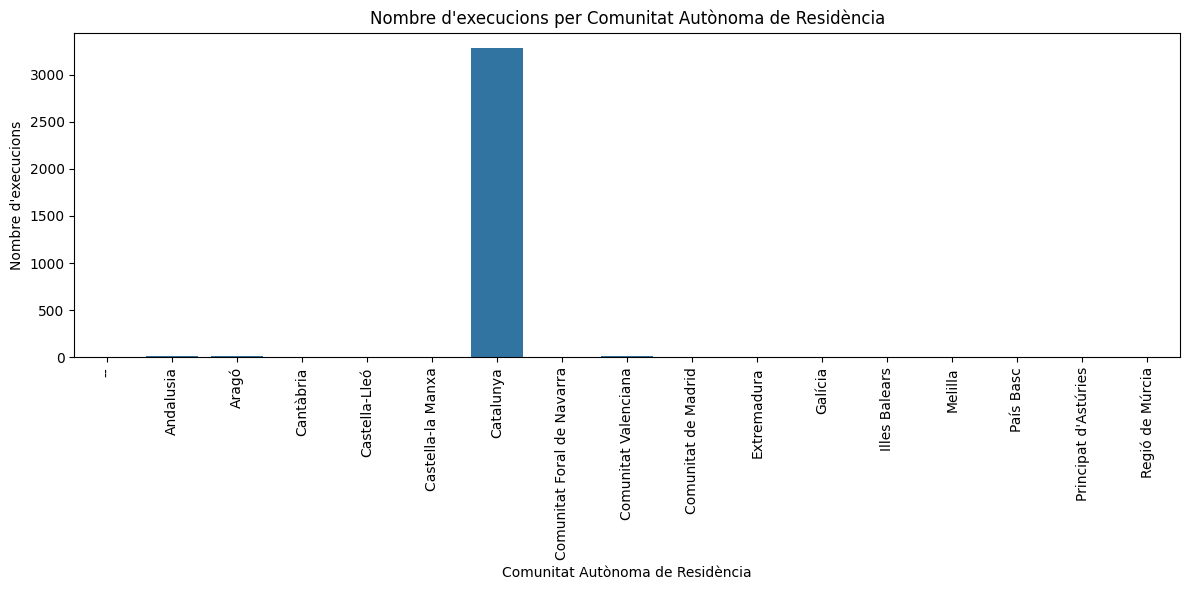

In [ ]:
# Visualització de afusellaments per comunitat autònoma de residència

executions_by_community = df[df["Afusellades"] == "executat/da"].groupby("Comunitat autònoma residència")["Tipus_Pena"].count().reset_index()
executions_by_community.rename(columns={"Tipus_Pena": "Nombre d'execucions"}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x="Comunitat autònoma residència", y="Nombre d'execucions", data=executions_by_community)
plt.xticks(rotation=90)
plt.xlabel("Comunitat Autònoma de Residència")
plt.ylabel("Nombre d'execucions")
plt.title("Nombre d'execucions per Comunitat Autònoma de Residència")
plt.tight_layout()
plt.show()


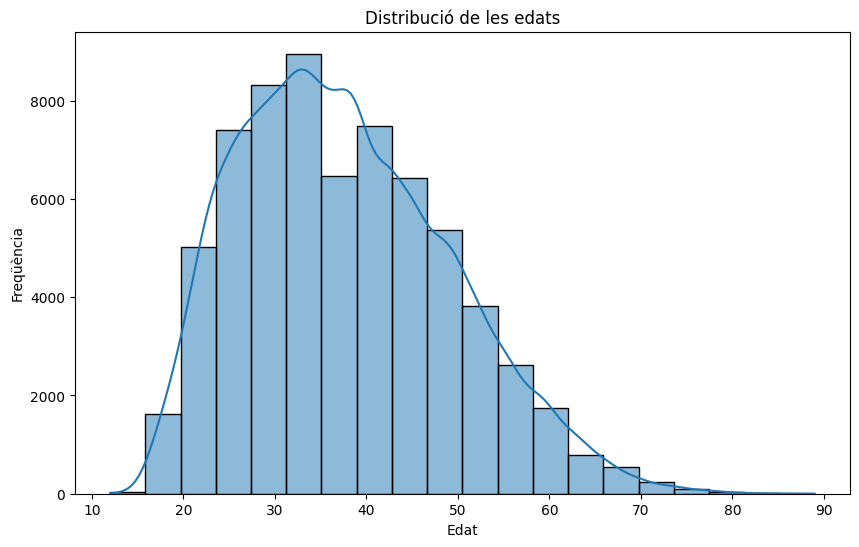

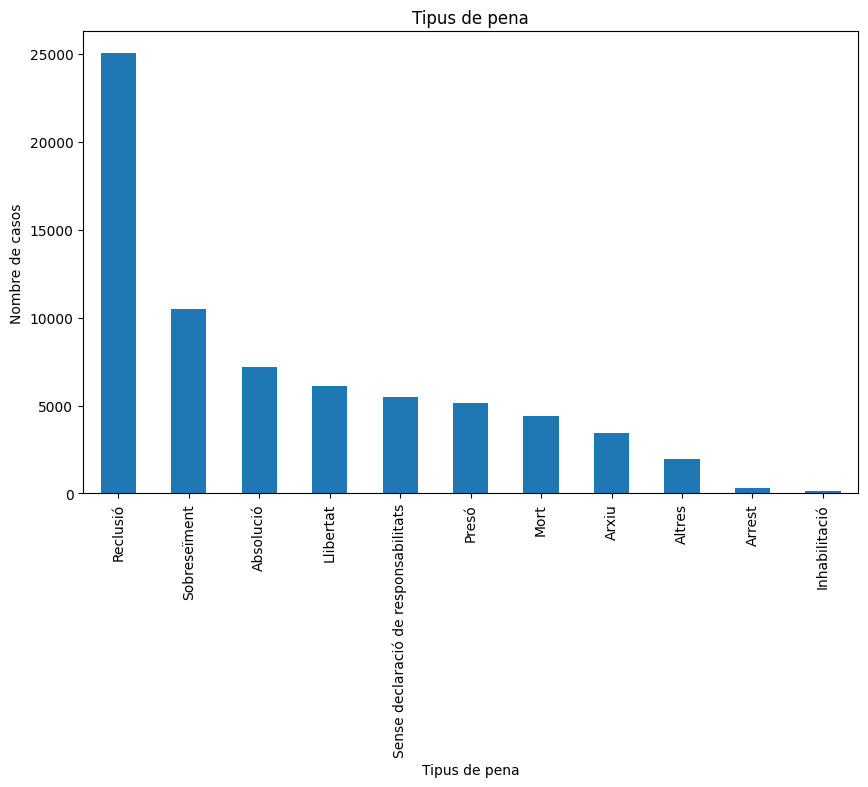

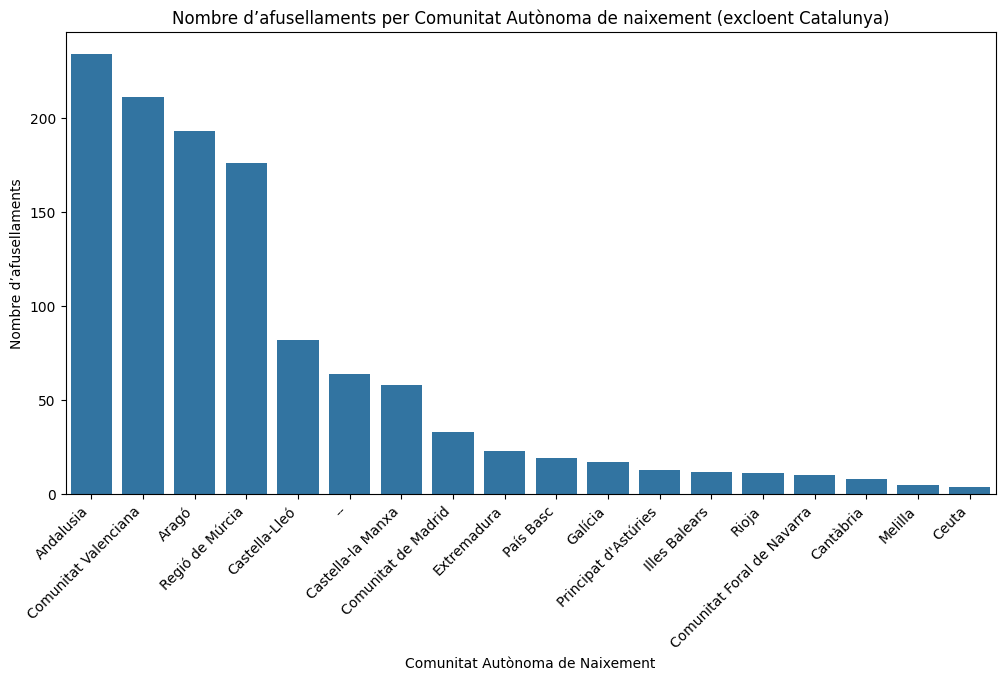

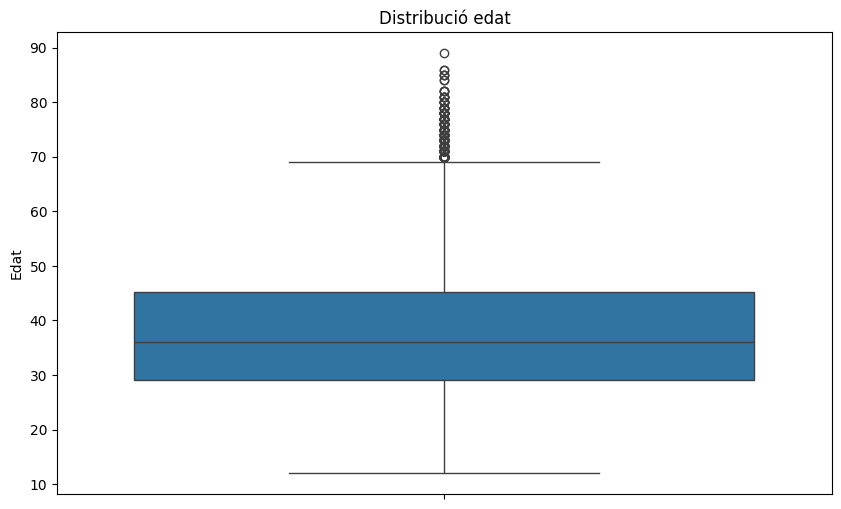

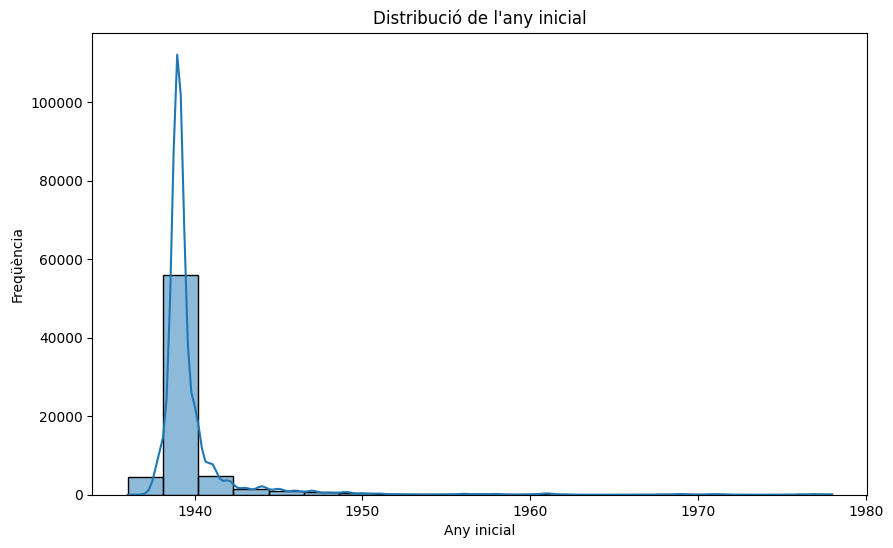

In [50]:
# Visualitzacions diverses

# Visualització 1: Distribució de les edats
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Edat'] != 9999]['Edat'], bins=20, kde=True)
plt.title('Distribució de les edats')
plt.xlabel('Edat')
plt.ylabel('Freqüència')
plt.show()

# Visualització 2: Tipus de pena
plt.figure(figsize=(10, 6))
df['Tipus_Pena'].value_counts().plot(kind='bar')
plt.title('Tipus de pena')
plt.xlabel('Tipus de pena')
plt.ylabel('Nombre de casos')
plt.show()

# Visualització 3: Nombre d'afusellaments per comunitat autònoma de naixement (excloent Catalunya)
plt.figure(figsize=(12, 6))
executats = df[(df["Tipus_Pena"] == "Mort") & (df["Comunitat autònoma naixement"] != "Catalunya")]
sns.countplot(x="Comunitat autònoma naixement", data=executats,
              order=executats["Comunitat autònoma naixement"].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Nombre d’afusellaments per Comunitat Autònoma de naixement (excloent Catalunya)')
plt.xlabel('Comunitat Autònoma de Naixement')
plt.ylabel('Nombre d’afusellaments')
plt.show()

# Visualització 4: Relació entre edat i tipus de pena
plt.figure(figsize=(10, 6))
sns.boxplot(y=df[df['Edat'] != 9999]['Edat'], data=df)
plt.title('Distribució edat')
plt.ylabel('Edat')
plt.show()

# Visualització 5: Distribució de l'any inicial
plt.figure(figsize=(10, 6))
sns.histplot(df['Any inicial'], bins=20, kde=True)
plt.title('Distribució de l\'any inicial')
plt.xlabel('Any inicial')
plt.ylabel('Freqüència')
plt.show()


In [ ]:
# Entrades on 'Edat' és 9999 i 'Afusellades' és 'executat/da'
df[(df["Edat"] == 9999) & (df["Afusellades"] == "executat/da")]

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89,Anys_pena,Mesos_pena,Tipus_Pena
3030,21917,"Aranguren Roldán, José",Aranguren Roldán,José,Home,9999.0,Ferrol,--,Corunya,Galícia,Espanya,València,Horta,València,Comunitat Valenciana,Espanya,Consells de guerra,Causa,1939.0,1939.0,Mort,NaN,executat/da,-8.233353e+09,4.348451e+09,-37565717.0,3.947534e+09,0,0,Mort
6418,43363,"Bayé Planelles, Cayetano",Bayé Planelles,Cayetano,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,1939.0,1939.0,Mort,NaN,executat/da,NaN,NaN,NaN,NaN,0,0,Mort
14892,46558,"Cherta Marsal, José",Cherta Marsal,José,Home,9999.0,Alcalà de Xivert,Baix Maestrat,Castelló,Comunitat Valenciana,Espanya,Salou,Tarragonès,Tarragona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Mort,NaN,executat/da,2.257152e+07,4.030417e+09,113197961.0,4.107685e+09,0,0,Mort
27190,49261,"Gatius Blanch, José",Gatius Blanch,José,Home,9999.0,Setcases,Ripollès,Girona,Catalunya,Espanya,Castell-Platja d'Aro,Baix Empordà,Girona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Mort,NaN,executat/da,2.301155e+08,4.237552e+09,306798443.0,4.181427e+09,0,0,Mort
29614,52437,"Granada Costa, Juan",Granada Costa,Juan,Home,9999.0,Tarragona,Tarragonès,Tarragona,Catalunya,Espanya,Tarragona,Tarragonès,Tarragona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Mort,NaN,executat/da,1.258422e+07,4.111910e+09,12584219.0,4.111910e+09,0,0,Mort
37457,50622,"Martí Servalló, Juan",Martí Servalló,Juan,Home,9999.0,"Espluga de Francolí, l'",Conca de Barberà,Tarragona,Catalunya,Espanya,"Espluga de Francolí, l'",Conca de Barberà,Tarragona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Mort,NaN,executat/da,1.102891e+08,4.139649e+09,110289096.0,4.139649e+09,0,0,Mort
48353,113446,"Pérez Sacristán, Santiago",Pérez Sacristán,Santiago,Home,9999.0,--,--,--,--,--,--,--,--,--,--,Consells de guerra,Sumaríssim,1940.0,NaN,Mort,NaN,executat/da,NaN,NaN,NaN,NaN,0,0,Mort
61396,18468,"Servitge Torrellardona, José",Servitge Torrellardona,José,Home,9999.0,Òdena,Anoia,Barcelona,Catalunya,Espanya,Òdena,Anoia,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Mort,NaN,executat/da,1.638468e+08,4.160541e+09,163846821.0,4.160541e+09,0,0,Mort


In [ ]:
# Entrades que tenen mesos_pena > 0 i tipus_pena = mort

count_mesos_pena_mort = df[(df["Mesos_pena"] > 0) & (df["Tipus_Pena"] == "Mort")].shape[0]
print("Nombre d'entrades amb mesos_pena > 0 i tipus_pena mort:", count_mesos_pena_mort)

Nombre d'entrades amb mesos_pena > 0 i tipus_pena mort: 0


In [ ]:
# Mostrem els valors nuls de cada columna per a les entrades on "Edat" = 9999
print(df[df["Edat"] == 9999].isnull().sum())

Codi                                      0
Cognoms nom                               0
Cognoms                                   0
Nom                                       0
Sexe                                      0
Edat                                      0
Municipi naixement                        0
Comarca naixement                         0
Província naixement                       0
Comunitat autònoma naixement              0
País naixement                            0
Municipi residència                       0
Comarca residència                        0
Província residència                      0
Comunitat autònoma residència             0
País residència                           0
Tipus procediment 1                       0
Tipus procediment 2                       0
Any inicial                               0
Any aprovació sen o altra resol         355
Pena                                      0
Commutació/indult (demanat)            2660
Afusellades                     

In [ ]:
# Creem nova columna per a les dades de longitud i latitud reals

df['Naixement_Longitud_REAL'] = df['Municipi_Naixement_Longitud_ETRS89'] / 1e8
df['Naixement_Latitud_REAL'] = df['Municipi_Naixement_Latitud_ETRS89'] / 1e8
df['Residencia_Longitud_REAL'] = df['Municipi_Residencia_Longitud_ETRS89'] / 1e8
df['Residencia_Latitud_REAL'] = df['Municipi_Residencia_Latitud_ETRS89'] / 1e8

In [ ]:
df.head()

,Codi,Cognoms nom,Cognoms,Nom,Sexe,Edat,Municipi naixement,Comarca naixement,Província naixement,Comunitat autònoma naixement,País naixement,Municipi residència,Comarca residència,Província residència,Comunitat autònoma residència,País residència,Tipus procediment 1,Tipus procediment 2,Any inicial,Any aprovació sen o altra resol,Pena,Commutació/indult (demanat),Afusellades,Municipi_Naixement_Longitud_ETRS89,Municipi_Naixement_Latitud_ETRS89,Municipi_Residencia_Longitud_ETRS89,Municipi_Residencia_Latitud_ETRS89,Anys_pena,Mesos_pena,Tipus_Pena,Naixement_Longitud_REAL,Naixement_Latitud_REAL,Residencia_Longitud_REAL,Residencia_Latitud_REAL
0,135218,"Abad Alfonso, Erundina",Abad Alfonso,Erundina,Dona,43.0,Alcoi,Alcoià,Alacant,Comunitat Valenciana,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1942.0,1943.0,Sobreseïment,NaN,NaN,-47318376.0,3.869837e+09,217634927.0,4.138425e+09,0,0,Sobreseïment,-0.473184,38.698369,2.176349,41.384247
1,25335,"Abad Arbós, Ricardo",Abad Arbós,Ricardo,Home,30.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,--,--,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,2.176349,41.384247,2.176349,41.384247
2,123192,"Abad Baras, José",Abad Baras,José,Home,30.0,Benavarri,Ribagorça,Osca,Aragó,Espanya,Lleida,Segrià,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Absolt,NaN,NaN,48188113.0,4.210699e+09,62061934.0,4.161527e+09,0,0,Absolució,0.481881,42.106994,0.620619,41.615274
3,171,"Abad Batllone, Juan",Abad Batllone,Juan,Home,42.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,2.176349,41.384247,2.176349,41.384247
4,24485,"Abad Boira, Ricardo",Abad Boira,Ricardo,Home,48.0,Tauste,--,Saragossa,Aragó,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1941.0,1942.0,Sense declaració de responsabilitats,NaN,NaN,-125694062.0,4.192139e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,-1.256941,41.921394,2.176349,41.384247


In [ ]:
# Reemplaçem NaN amb "--" en les columnes que ens interessa
columns_to_replace = ["Any inicial", "Any aprovació sen o altra resol", "Commutació/indult (demanat)", "Afusellades"]
for col in columns_to_replace:
    df[col] = df[col].fillna("--")

In [ ]:
print(df.isna().sum())

Codi                                      0
Cognoms nom                               0
Cognoms                                   0
Nom                                       0
Sexe                                      0
Edat                                      0
Municipi naixement                        0
Comarca naixement                         0
Província naixement                       0
Comunitat autònoma naixement              0
País naixement                            0
Municipi residència                       0
Comarca residència                        0
Província residència                      0
Comunitat autònoma residència             0
País residència                           0
Tipus procediment 1                       0
Tipus procediment 2                       0
Any inicial                               0
Any aprovació sen o altra resol           0
Pena                                      0
Commutació/indult (demanat)               0
Afusellades                     

In [ ]:
# Revisem els valors ùnics de la columna "Commutació/indult (demanat)"
df["Commutació/indult (demanat)"].unique()

array(['--', 'Sis anys i un dia de presó major',
       'Dotze anys i un dia de reclusió menor',
       'Sis anys i un dia de presó menor', 'Tres anys de presó menor',
       'Indultat', 'Indultat per la quarta part de la pena imposada',
       'Un any de presó menor', 'Dotze anys de presó major',
       'Quatre anys de presó menor', 'Vuit anys de presó major',
       'Sis mesos i un dia de presó menor', 'Sis anys de presó menor',
       'Vint anys de reclusió menor',
       'Sis anys de presó menor amb presó atenuada', 'Reclusió perpètua',
       'Dotze anys i un dia de reclusió menor/ Indultat/',
       'Dotze anys de presó major/ Indultat/',
       'Tres anys i un dia de presó menor', 'Vint anys de presó menor',
       'Deu anys de presó menor', 'Nou anys presó major',
       'Trenta anys de reclusió major',
       'Vint anys i un dia de reclusió temporal',
       'Sis anys i un dia de presó correccional',
       'Nou anys de presó major', 'Reclusió perpètua/ Indultat/',
       'Un 

In [ ]:
# Funció per a netejar el indult'
def netejar_indult(text):
    if 'Indult' in text:
        return 'Indultat'
    # Si no, agafa l'últim fragment després del darrer '/'
    parts = [part.strip() for part in text.split('/') if part.strip()]
    return parts[-1] if parts else text.strip()

In [ ]:
df['Commutació/indult (demanat)'] = df['Commutació/indult (demanat)'].apply(netejar_indult)
df["Commutació/indult (demanat)"].unique()

array(['--', 'Sis anys i un dia de presó major',
       'Dotze anys i un dia de reclusió menor',
       'Sis anys i un dia de presó menor', 'Tres anys de presó menor',
       'Indultat', 'Un any de presó menor', 'Dotze anys de presó major',
       'Quatre anys de presó menor', 'Vuit anys de presó major',
       'Sis mesos i un dia de presó menor', 'Sis anys de presó menor',
       'Vint anys de reclusió menor',
       'Sis anys de presó menor amb presó atenuada', 'Reclusió perpètua',
       'Tres anys i un dia de presó menor', 'Vint anys de presó menor',
       'Deu anys de presó menor', 'Nou anys presó major',
       'Trenta anys de reclusió major',
       'Vint anys i un dia de reclusió temporal',
       'Sis anys i un dia de presó correccional',
       'Nou anys de presó major', 'Un any de presó correccional',
       'Vint anys i un dia de reclusió major',
       'Quinze anys de reclusió temporal', 'Dos anys de presó menor',
       'Tres anys de presó', 'Vint anys de reclusió tempor

In [ ]:
import geopandas as gpd

In [ ]:
# Carrega el GeoJSON
gdf = gpd.read_file('divisions-administratives-v2r1-municipis-5000-20250101.json')

# Mostra les primeres files
gdf.head()

,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,080018,Abrera,Abrera,19.9781,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((1.92486 41.53663, 1.92197 41.5..."
1,080023,Aguilar de Segarra,Aguilar de Segarra,43.2198,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"MULTIPOLYGON (((1.60824 41.77021, 1.60801 41.7..."
2,080039,Alella,Alella,9.6346,21,Maresme,Mataró,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.28512 41.51534, 2.28501 41.5..."
3,080044,Alpens,Alpens,13.7788,43,Lluçanès,Prats de Lluçanès,07,Catalunya Central,*,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.09358 42.14245, 2.09225 42.1..."
4,080057,l'Ametlla del Vallès,l'Ametlla del Vallès,14.0885,41,Vallès Oriental,Granollers,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.24161 41.70304, 2.24178 41.7..."


In [ ]:
df_cat = df[df['Comunitat autònoma residència'] == "Catalunya"]
municipis_df = pd.Series(df_cat['Municipi residència'].unique())
municipis_gdf = pd.Series(gdf['NOMMUNI'].unique())

In [ ]:
# Trobar coincidències i diferències
matches = municipis_df[municipis_df.isin(municipis_gdf)]
differences_df = municipis_df[~municipis_df.isin(municipis_gdf)]
differences_gdf = municipis_gdf[~municipis_gdf.isin(municipis_df)]

print("\nNumber of matches:", len(matches))
print("Number of differences in df:", len(differences_df))
print("Number of differences in gdf:", len(differences_gdf))

# You can further analyze 'differences_df' and 'differences_gdf' to understand the discrepancies
# For example, print the unique values that are not matching:
print("\nUnique municipalities in df not found in gdf:")
print(differences_df.unique())

print("\nUnique municipalities in gdf not found in df:")
print(differences_gdf.unique())


Number of matches: 801
Number of differences in df: 149
Number of differences in gdf: 146

Unique municipalities in df not found in gdf:
['Portella, la' 'Hostalets de Pierola, els' 'Avellanes i Santa Linya, les'
 'Soleràs, el' "Palma d'Ebre, la" 'Granadella, la' 'Calonge'
 'Sant Carles de la Ràpita' 'Figuera, la' 'Piles, les'
 "Espluga de Francolí, l'" 'Garriga, la' 'Molar, el' 'Vilella Baixa, la'
 'Bisbal de Falset, la' 'Prat de Llobregat, el' 'Sénia, la'
 "Hospitalet de Llobregat, l'" 'Riba, la' "Ametlla de Mar, l'"
 'Galera, la' 'Masnou, el' 'Poal, el' 'Santa Maria de Corcó'
 'Sentiu de Sió, la' 'Pobla de Claramunt, la' '--' 'Torre de Cabdella, la'
 "Albiol, l'" 'Bisbal del Penedès, la' 'Vansa i Fórnols, la'
 'Borges Blanques, les' "Tallada d'Empordà, la" 'Masies de Voltregà, les'
 "Espluga Calba, l'" 'Papiol, el' 'Palma de Cervelló, la' "Albi, l'"
 "Planes d'Hostoles, les" "Aleixar, l'" 'Torms, els' 'Pobla de Lillet, la'
 'Catllar, el' "Castell-Platja d'Aro" 'Canonja, la' 'Fatarel

In [ ]:

def clean_municipality_name(name):
    if pd.isna(name):
        return name

    parts = name.split(',')
    if len(parts) > 1:
        right_part = parts[1].strip()
        left_part = parts[0].strip()
        # Si l'article apostrofat està al començament (ex. l')
        if right_part.lower().startswith("l'"):
            return right_part + left_part  # sense espai
        else:
            return right_part + " " + left_part  # amb espai
    else:
        return name

# Aplicar la funció
municipis_df = municipis_df.apply(clean_municipality_name)


In [ ]:
# Trobar coincidències i diferències
matches = municipis_df[municipis_df.isin(municipis_gdf)]
differences_df = municipis_df[~municipis_df.isin(municipis_gdf)]
differences_gdf = municipis_gdf[~municipis_gdf.isin(municipis_df)]

In [ ]:
print("Nombre de coincidències:", len(matches))
print("Nombre de diferències en df:", len(differences_df))
print("Nombre de diferències en gdf:", len(differences_gdf))

print("\nMunicipis en df no trobats en gdf:")
print(differences_df.unique())

print("\nMunicipis en gdf no trobats en df:")
print(differences_gdf.unique())


Number of matches: 926
Number of differences in df: 24
Number of differences in gdf: 21

Unique municipalities in df not found in gdf:
['Calonge' 'Sant Carles de la Ràpita' 'les Piles' 'la Bisbal de Falset'
 'Santa Maria de Corcó' '--' "Castell-Platja d'Aro"
 "Monells i Sant Sadurní de l'Heura Cruïlles" 'Corbera' 'Bigues i Riells'
 'Saus' 'Brunyola' "Boadella d'Empordà"
 "Monells i Sant Sadurní de l'Heura CruÏlles" 'Masarac' 'Lliçà de Munt'
 'es Bòrdes' 'La Pobla de Lillet' 'Palau-Solità i Plegamans'
 'Els Guiamets' 'La Portella' "L'Armentera" 'LLuçà' 'Arres de Jos']

Unique municipalities in gdf not found in df:
['Bigues i Riells del Fai' "Lliçà d'Amunt" "l'Esquirol" 'Badia del Vallès'
 'Brunyola i Sant Martí Sapresa' 'Boadella i les Escaules'
 'Calonge i Sant Antoni' "Castell d'Aro, Platja d'Aro i s'Agaró"
 'Masarac i Vilarnadal' 'Saus, Camallera i Llampaies' 'Urús'
 "Cruïlles, Monells i Sant Sadurní de l'Heura" 'Arres' 'Es Bòrdes'
 'Bellaguarda' 'la Bisbal de Montsant' 'la Febró' '

In [ ]:
# Diccionari d'equivalències
equivalencies = {
    "L'Armentera": "l'Armentera",
    "Arres de Jos": "Arres",
    "Bigues i Riells": "Bigues i Riells del Fai",
    "la Bisbal de Falset": "la Bisbal de Montsant",
    "Boadella d'Empordà": "Boadella i les Escaules",
    "Brunyola": "Brunyola i Sant Martí Sapresa",
    "es Bòrdes": "Es Bòrdes",
    "Calonge": "Calonge i Sant Antoni",
    "Castell-Platja d'Aro": "Castell d'Aro, Platja d'Aro i s'Agaró",
    "Corbera": "Corbera d'Ebre",
    "Monells i Sant Sadurní de l'Heura CruÏlles": "Cruïlles, Monells i Sant Sadurní de l'Heura",
    "Monells i Sant Sadurní de l'Heura Cruïlles": "Cruïlles, Monells i Sant Sadurní de l'Heura",
    "Els Guiamets": "els Guiamets",
    "LLuçà": "Lluçà",
    "Lliçà de Munt": "Lliçà d'Amunt",
    "Masarac": "Masarac i Vilarnadal",
    "Palau-Solità i Plegamans": "Palau-solità i Plegamans",
    "les Piles": "les Piles de Gaià",
    "La Pobla de Lillet": "la Pobla de Lillet",
    "La Portella": "la Portella",
    "Sant Carles de la Ràpita": "la Ràpita",
    "Santa Maria de Corcó": "l'Esquirol",
    "Saus": "Saus, Camallera i Llampaies"
}

# Aplicar traducció
municipis_df = municipis_df.replace(equivalencies)

In [ ]:
# Trobar coincidències i diferències
matches = municipis_df[municipis_df.isin(municipis_gdf)]
differences_df = municipis_df[~municipis_df.isin(municipis_gdf)]
differences_gdf = municipis_gdf[~municipis_gdf.isin(municipis_df)]

print("\nNumber of matches:", len(matches))
print("Number of differences in df:", len(differences_df))
print("Number of differences in gdf:", len(differences_gdf))

print("\nUnique municipalities in df not found in gdf:")
print(differences_df.unique())

print("\nUnique municipalities in gdf not found in df:")
print(differences_gdf.unique())


Number of matches: 949
Number of differences in df: 1
Number of differences in gdf: 6

Unique municipalities in df not found in gdf:
['--']

Unique municipalities in gdf not found in df:
['Badia del Vallès' 'Urús' 'Bellaguarda' 'la Febró' 'Renau'
 'Vespella de Gaià']


In [ ]:
# Aplica només la neteja als municipis de les comunitats d'interès
df["Municipi residència"] = df["Municipi residència"].apply(clean_municipality_name)

In [ ]:
# Aplica el diccionari de substitució només a les files filtrades
df["Municipi residència"] = df["Municipi residència"].replace(equivalencies)

In [ ]:
# Converteix a conjunt el dataframe dels municipis
municipis_df_set = set(municipis_df)

# Filtra els municipis de Catalunya que no coincideixen
no_match = df[(df["Comunitat autònoma residència"] == "Catalunya") & (~df["Municipi residència"].isin(municipis_df_set))]

print(f"Número de municipis no coincidents: {no_match['Municipi residència'].nunique()}")
print(no_match["Municipi residència"].unique())

Número de municipis no coincidents: 0
[]


In [ ]:
# Filtra els municipis de Catalunya que coincideixen
match = df[(df["Comunitat autònoma residència"] == "Catalunya") & (df["Municipi residència"].isin(municipis_df_set))]

print(f"Número de municipis coincidents: {match['Municipi residència'].nunique()}")

Número de municipis coincidents: 942


In [ ]:
df.rename(columns={
    'Codi': 'codi',
    'Cognoms nom': 'cognoms_nom',
    'Cognoms': 'cognoms',
    'Nom': 'nom',
    'Sexe': 'sexe',
    'Edat': 'edat',
    'Municipi naixement': 'municipi_naixement',
    'Comarca naixement': 'comarca_naixement',
    'Província naixement': 'provincia_naixement',
    'Comunitat autònoma naixement': 'comunitat_autonoma_naixement',
    'País naixement': 'pais_naixement',
    'Municipi residència': 'municipi_residencia',
    'Comarca residència': 'comarca_residencia',
    'Província residència': 'provincia_residencia',
    'Comunitat autònoma residència': 'comunitat_autonoma_residencia',
    'País residència': 'pais_residencia',
    'Tipus procediment 1': 'tipus_procediment_1',
    'Tipus procediment 2': 'tipus_procediment_2',
    'Any inicial': 'any_inicial',
    'Any aprovació sen o altra resol': 'any_aprovacio_sen_o_altra_resol',
    'Pena': 'pena',
    'Commutació/indult (demanat)': 'commutacio_indult_demanat',
    'Afusellades': 'afusellades',
    'Municipi_Naixement_Longitud_ETRS89': 'municipi_naixement_longitud_etrs89',
    'Municipi_Naixement_Latitud_ETRS89': 'municipi_naixement_latitud_etrs89',
    'Municipi_Residencia_Longitud_ETRS89': 'municipi_residencia_longitud_etrs89',
    'Municipi_Residencia_Latitud_ETRS89': 'municipi_residencia_latitud_etrs89',
    'Anys_pena': 'anys_pena',
    'Mesos_pena': 'mesos_pena',
    'Tipus_Pena': 'tipus_pena'
}, inplace=True)

In [ ]:
df

,codi,cognoms_nom,cognoms,nom,sexe,edat,municipi_naixement,comarca_naixement,provincia_naixement,comunitat_autonoma_naixement,pais_naixement,municipi_residencia,comarca_residencia,provincia_residencia,comunitat_autonoma_residencia,pais_residencia,tipus_procediment_1,tipus_procediment_2,any_inicial,any_aprovacio_sen_o_altra_resol,pena,commutacio_indult_demanat,afusellades,municipi_naixement_longitud_etrs89,municipi_naixement_latitud_etrs89,municipi_residencia_longitud_etrs89,municipi_residencia_latitud_etrs89,anys_pena,mesos_pena,tipus_pena,Naixement_Longitud_REAL,Naixement_Latitud_REAL,Residencia_Longitud_REAL,Residencia_Latitud_REAL
0,135218,"Abad Alfonso, Erundina",Abad Alfonso,Erundina,Dona,43.0,Alcoi,Alcoià,Alacant,Comunitat Valenciana,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1942.0,1943.0,Sobreseïment,--,--,-47318376.0,3.869837e+09,217634927.0,4.138425e+09,0,0,Sobreseïment,-0.473184,38.698369,2.176349,41.384247
1,25335,"Abad Arbós, Ricardo",Abad Arbós,Ricardo,Home,30.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,--,--,1939.0,1939.0,Sense declaració de responsabilitats,--,--,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,2.176349,41.384247,2.176349,41.384247
2,123192,"Abad Baras, José",Abad Baras,José,Home,30.0,Benavarri,Ribagorça,Osca,Aragó,Espanya,Lleida,Segrià,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Absolt,--,--,48188113.0,4.210699e+09,62061934.0,4.161527e+09,0,0,Absolució,0.481881,42.106994,0.620619,41.615274
3,171,"Abad Batllone, Juan",Abad Batllone,Juan,Home,42.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1939.0,1939.0,Sense declaració de responsabilitats,--,--,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,2.176349,41.384247,2.176349,41.384247
4,24485,"Abad Boira, Ricardo",Abad Boira,Ricardo,Home,48.0,Tauste,--,Saragossa,Aragó,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1941.0,1942.0,Sense declaració de responsabilitats,--,--,-125694062.0,4.192139e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,-1.256941,41.921394,2.176349,41.384247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69828,127208,"Zurita Del Moral, José",Zurita Del Moral,José,Home,64.0,Antequera,--,Màlaga,Andalusia,Espanya,Tortosa,Baix Ebre,Tarragona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1940.0,1942.0,Sobreseïment,--,--,-455804451.0,3.701422e+08,52500631.0,4.081102e+09,0,0,Sobreseïment,-4.558045,3.701422,0.525006,40.811021
69829,100026,"Zurita Martínez, Mariano",Zurita Martínez,Mariano,Home,49.0,Montarrón,--,Guadalajara,Castella-la Manxa,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1941.0,1943.0,Sense declaració de responsabilitats,--,--,-311915129.0,4.090668e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,-3.119151,40.906684,2.176349,41.384247
69830,67026,"Zurita Omella, Nicolás",Zurita Omella,Nicolás,Home,22.0,Cretes,Matarranya,Terol,Aragó,Espanya,Blanes,Selva,Girona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1940.0,Vint anys de reclusió temporal,--,--,2117607.0,4.092857e+09,279229296.0,4.167592e+09,20,0,Reclusió,0.021176,40.928573,2.792293,41.675922
69831,120572,"Zurita Sala, Odón",Zurita Sala,Odón,Home,42.0,Palamós,Baix Empordà,Girona,Catalunya,Espanya,Palamós,Baix Empordà,Girona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1942.0,1942.0,Sobreseïment,--,--,312865803.0,4.184675e+09,312865803.0,4.184675e+09,0,0,Sobreseïment,3.128658,41.846747,3.128658,41.846747


In [ ]:
df["afusellades"].value_counts()

,count
afusellades,
--,66378
executat/da,3368


In [ ]:
# Guardem el dataframe com csv amb el nom data_final

#df.to_csv('data_final.csv', index=False)